# WeatherAPI


---

# Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

/Users/jnorth/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import json

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '%20')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | nacala
Processing Record 4 of Set 1 | antsiranana
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | kasane
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | sarkand
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | bardai
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | kapus

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [2]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display data from saved file
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,292.73,72,60,7.87,PN,1690392736
1,kodiak,57.7900,-152.4072,285.88,94,100,0.00,US,1690392749
2,nacala,-14.5428,40.6728,294.75,71,7,4.09,MZ,1690393064
3,antsiranana,-12.2787,49.2917,296.44,72,80,7.95,MG,1690393069
4,invercargill,-46.4000,168.3500,278.75,90,95,12.79,NZ,1690392541


### Create the Scatter Plots
#### Latitude Vs. Temperature

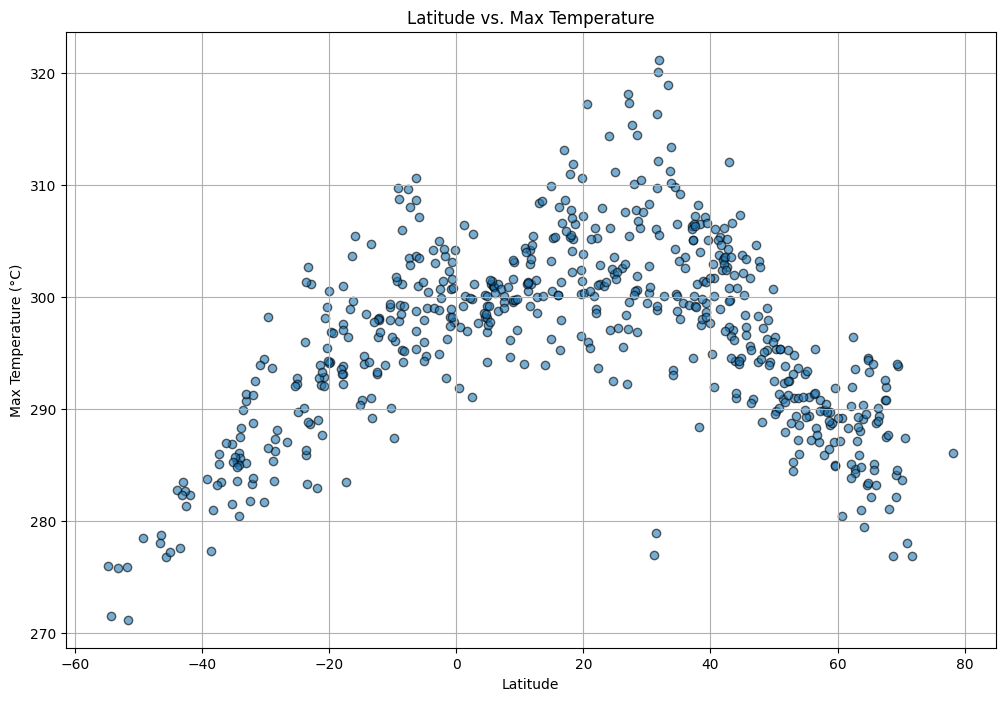

In [9]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, max_temp, alpha=0.6, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')  
plt.title('Latitude vs. Max Temperature')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

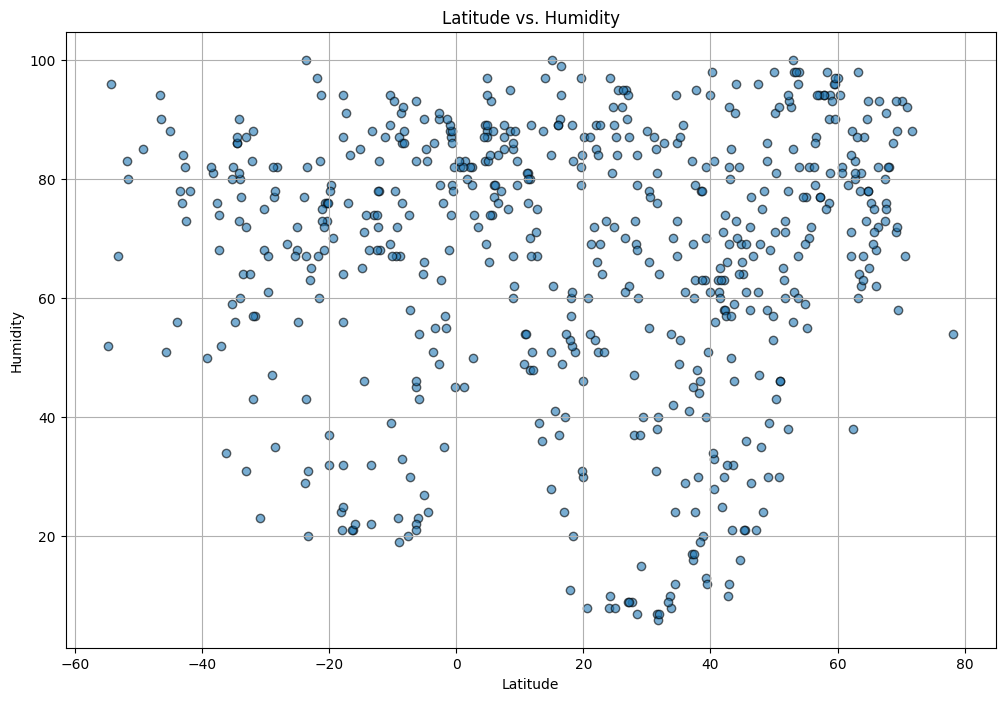

In [10]:
# Build scatter plot for latitude vs. humidity

latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, humidity, alpha=0.6, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity')  
plt.title('Latitude vs. Humidity')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

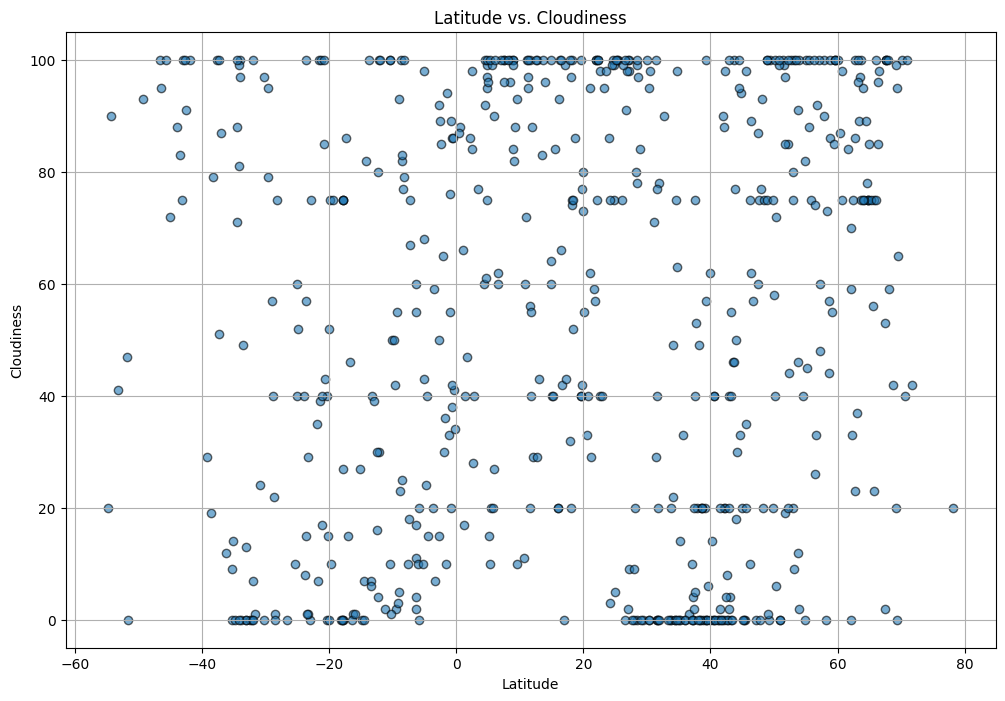

In [12]:
# Build scatter plot for latitude vs. cloudiness

latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, cloudiness, alpha=0.6, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')  
plt.title('Latitude vs. Cloudiness')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

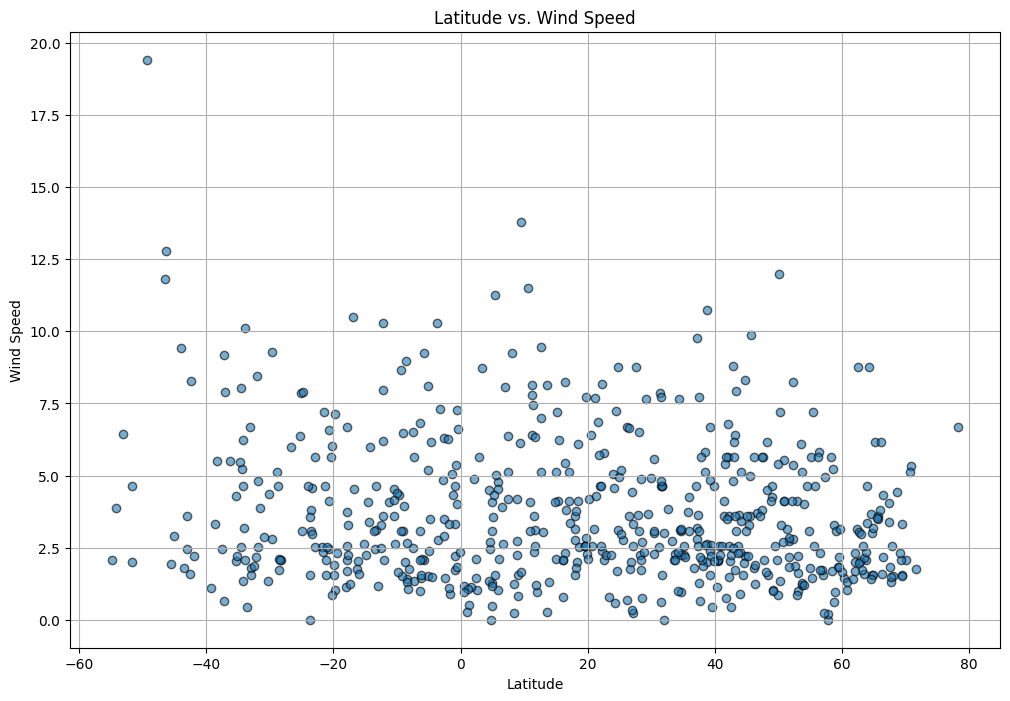

In [13]:
# Build scatter plot for latitude vs. cloudiness

latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, wind, alpha=0.6, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')  
plt.title('Latitude vs. Wind Speed')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()